# This file creates the four Basic Descriptive Visuals 

## Step 1: Compute all the numbers through python functions
## Step 2: Save the output to csv file. Need to give the csv file informing headers
## Step 3: Use matplotlib to plot the csv file

### The first three functions/boxes need to be run before checking with any of the visual-specific functions:

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
from pymongo import MongoClient
import time

##authentication info removed. fc = targeted colllection
fc.count() #词条总量 1，300，000，000 +

In [2]:
#Input: dates(YYYY-MM-DD), number of months you want to count
#output: an array of the dates: the first and last day of each month during the two dates

#This function is important because the later computations all rely on it to get the list of dates 
# if weekly data is needed, just replace "months" with "weeks" in the marked line
# the later functions will compute the weekly date accordingly


#Ideally, the input date should start at the beginning of a month(2014-03-01) so that the visuals later
#can have clearly marked x-axis, but the function also works if the input is a date in the middle a 
#month(2014-03-15), it will return you monthly dates starting from the middle. See the function call returns

import datetime
from datetime import date
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

def dates(date, num_month):
    date = datetime.strptime(date, '%Y-%m-%d')
    ls =[]
    for i in range(0,num_month+1):
        new_date1 = date + relativedelta(months=+i) #"months" can be replaced by "weeks" to compute weekly data
        new_date2 = new_date1 - timedelta(1)
        new_date2 = new_date2.strftime('%Y-%m-%d')
        new_date1= new_date1.strftime('%Y-%m-%d')
        ls.append(new_date2)
        ls.append(new_date1)
    
    ls = ls[1:-1]
    return ls

first_date = dates('2016-04-01', 3)
middle_date = dates('2016-04-15', 3)

print(first_date)
print(middle_date)

['2016-04-01', '2016-04-30', '2016-05-01', '2016-05-31', '2016-06-01', '2016-06-30']
['2016-04-15', '2016-05-14', '2016-05-15', '2016-06-14', '2016-06-15', '2016-07-14']


In [3]:
# Helper function, to iterate every two elements in a list
# takes a list
# returns every two elements in that list

def pairwise(it):
    it = iter(it)
    while True:
        yield next(it), next(it)

## Function 1. Count the frequency of posts for each group  (two functions)

In [19]:
# Input: collection name, group name, start date(YYYY-MM-DD), end date, inclusive
# Output: the number of posts during these periods (int)

def total_posts_for_group (collection, group, start_date, end_date): 
    m = collection.aggregate([
        {"$match": {"page": group, "comment_published": {'$gte': start_date,"$lt": end_date}}},
        {"$group":{"_id": '$status_id'}},
            {"$group": {"_id": "null","count2": { "$sum": 1 }}}
    ])
    count = []
    for i in m:
        count.append(i['count2'])
    return count[0]

In [17]:
#Input: collection name, group name, start_date(YYYY-MM-DD), number of months you want to count from 
#the start date (int)
#Output: the number of posts in an array

def total_posts_for_group2(collection, group, start_date, num_month):
    output = []
    
    date_ls = dates (start_date, num_month)
    length_date_ls = len(date_ls)
    
    for a, b in pairwise(date_ls):
        start_date = a
        end_date = b
        print("start date:", start_date)
        print("end date:", end_date)
        output2 = total_posts_for_group(collection, group, start_date, end_date)
        output.append(output2)      
        
    return output

# output saved to "posts.csv"

## Function 2. Count the frequency of comments for each group (Two functions)

In [12]:
#Input: Collection name, group name, star_date (YYYY-MM-DD), end_date(YYYY-MM-DD)
#Output: Number of comments (int)

def total_comments_for_group (collection, group, start_date, end_date): 
    m = collection.aggregate([
        {"$match": {"page": group, "comment_published": {'$gte': start_date,"$lt": end_date}}},
        {"$group":{"_id": '$comment_id'}},
            {"$group": {"_id": "null","count2": { "$sum": 1 }}}
    ])
    count = []
    for i in m:
        count.append(i['count2'])
    print("count: ", count)
    return count[0]

In [8]:
#Input: Collection name, group name, start_date (YYYY-MM-DD), number of months you want to count from the start_date
#Output: An array of monthly comments

def total_comments_for_group2 (collection, group, start_date, num_month):
    output = []
    
    date_ls = dates (start_date, num_month)
    print(date_ls)
    length_date_ls = len(date_ls)
    
    for a, b in pairwise(date_ls):
        start_date = a
        end_date = b
        print("start date:", start_date)
        print("end date:", end_date)
        output2 = total_comments_for_group(collection, group, start_date, end_date)
        output.append(output2)      
        
    return output

#results saved to "comments.csv"

## Function 3. Unique Commenters in each group every month (Two functions)

In [14]:
# Input: collection name, group name, start_date, end_date
# the dates should be in the format YYYY-MM-DD
# Output: an integer representing the total distinct commenters in this group during these two dates

def total_commenters_for_group (collection, group, start_date, end_date): 
    m = collection.aggregate([
        {"$match": {"page": group, "comment_published": {'$gte': start_date,"$lt": end_date}}},
            {"$group":{"_id": '$author_id'}},
            {"$group": {"_id": "null","count2": { "$sum": 1 }}}
    ])
    count = []
    for i in m:
        count.append(i['count2'])
    return count[0]

In [21]:
#Input: Collection name, group name, start date, and how many months we 
# want to count from the first starting date
#Output: an array of the number of commenters every month.     
def total_commenters_for_group2 (collection, group, start_date, num_month): 
    output = []
    
    date_ls = dates (start_date, num_month)
    length_date_ls = len(date_ls)
    
    
    for a, b in pairwise(date_ls):
        start_date = a
        end_date = b
        output2 = total_commenters_for_group(collection, group, start_date, end_date)
        output.append(output2)      
        
    return output

#Output saved in "total_commenters.csv"

## Function 4. New commenters in each group every month (Two functions)

In [4]:
#Input: collection name, group name, start_date0 is the date you want to use as a reference, 
#start_date is the start date you want to check for the new commenters. 
#end_date is the last day you want to check for the new commenters. 
#the dates are all inclusive for the computation. 

#Output: an integer of the new commenters during start_date and end_date with the reference date
# as start_date0

#Example: suppose there are 10000 people made comments during 2016-04-01(start_date) and 2016-04-30(end_date)
# but of these 10000 people, 8000 have made comments during 2016-01-01(start_date0) and 2016-03-30
# the output is 2000. That is, 2000 people are the new commenters

def new_commenters_in_group (collection, group, start_date0, start_date, end_date):
    
    #count all commenters from start_date0 to the end_date
    m = collection.aggregate([
        {"$match": {"page": group, "comment_published": {'$gte': start_date0,"$lt": end_date}}},
        {"$group":{"_id": '$author_id'}}])
    total_commenter = []
    for i in m:
        total_commenter.append(i['_id'])
    
    #count all commenters from start_date0 to the previous month
    n = collection.aggregate([
        {"$match": {"page": group, "comment_published": {'$gte': start_date0,"$lt": start_date}}},
        {"$group":{"_id": '$author_id'}}])
    previous_commenter =[]
    for i in n:
        previous_commenter.append(i['_id'])
    
    #substract the second group from the first group
    previous_commenter = set(previous_commenter)
    new_commenter = [x for x in total_commenter if x not in previous_commenter]
    
    return len(new_commenter)

In [5]:
#Input: collection name, group, start_date(YYYY-MM-DD), number of months you want to count from the starting date
#Output: an integer array that stores the monthly count of new commenters. 

def new_commenters_in_group2 (collection, group, start_date0, start_date, num_month):
    
    output = []
    
    date_ls = dates(start_date, num_month)
    print(date_ls)
    length_date_ls = len(date_ls)
    
    for a, b in pairwise(date_ls):
        start_date = a
        end_date = b
        print("start date:", start_date)
        print("end date:", end_date)
        output2 = new_commenters_in_group(collection, group, start_date0, start_date, end_date)
        output.append(output2)      
        
    return output

#Output saved in "new_commenters.csv"

In [6]:
collection = fc
start_date0 = '2015-01-01'
start_date ='2015-01-01'
num = 3
page1 = 'officialbritainfirst'
page2 = 'ukip'

new_commenters = new_commenters_in_group2(collection, page1, start_date0, start_date, num)
print(new_commenters)

['2015-01-01', '2015-01-31', '2015-02-01', '2015-02-28', '2015-03-01', '2015-03-31']
start date: 2015-01-01
end date: 2015-01-31
start date: 2015-02-01
end date: 2015-02-28
start date: 2015-03-01
end date: 2015-03-31
[85520, 59648, 54371]


# Visuals

In [28]:
import pandas as pd
from pandas import Series, DataFrame

## Visual 1: Monthly Posts

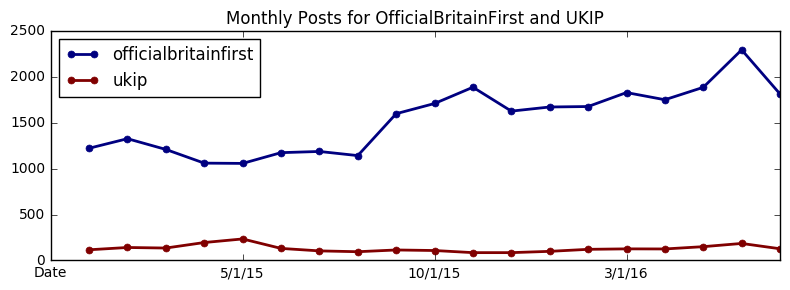

In [29]:
posts_df = pd.read_csv('posts.csv', index_col=0, parse_dates=True)

%matplotlib inline
posts_df.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Monthly Posts for OfficialBritainFirst and UKIP')
plt.gcf().set_size_inches(8,3)
plt.gcf().tight_layout()

## Visual 2: Monthly Comments

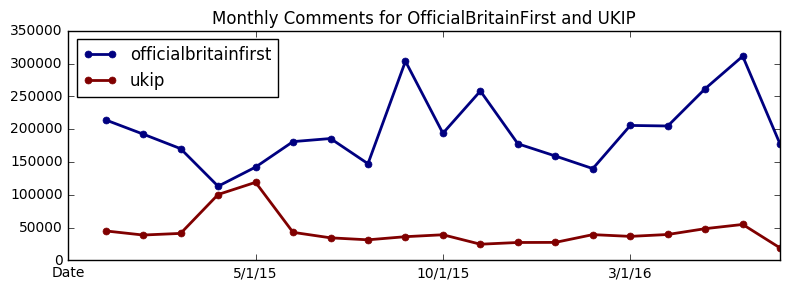

In [30]:
comments_df = pd.read_csv('comments.csv', index_col=0, parse_dates=True)

%matplotlib inline
comments_df.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Monthly Comments for OfficialBritainFirst and UKIP')
plt.gcf().set_size_inches(8,3)
plt.gcf().tight_layout()

## Visual 3: Total Commenters Each Month

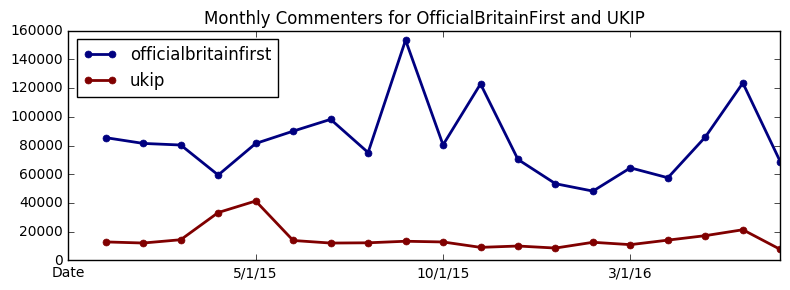

In [31]:
comments_df = pd.read_csv('total_commenters.csv', index_col=0, parse_dates=True)

%matplotlib inline
comments_df.plot(lw=2,colormap='jet',marker='.',markersize=10,title='Monthly Commenters for OfficialBritainFirst and UKIP')
plt.gcf().set_size_inches(8,3)
plt.gcf().tight_layout()

## Visual 4: New Commenters Each Month

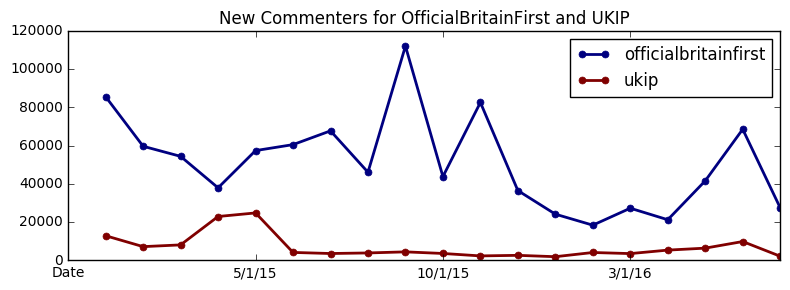

In [32]:
new_commenters_df = pd.read_csv('new_commenters.csv', index_col=0, parse_dates=True)

%matplotlib inline
new_commenters_df.plot(lw=2,colormap='jet',marker='.',markersize=10,title='New Commenters for OfficialBritainFirst and UKIP')
plt.gcf().set_size_inches(8,3)
plt.gcf().tight_layout()